In [1]:
import numpy as np
import pandas as pd

In [2]:
datafile = 'air_data.xlsx'
data = pd.read_excel(datafile)

In [3]:
explore = data.describe(percentiles=[], include='all').T  # 使用统计函数对数据进行统计分析
explore['null'] = len(data) - explore['count']  # 计算空值数
# describe有很多统计子项，这里就取我们要用到的即可
explore = explore[['null', 'mean', 'max', 'min']]
explore.columns = ['空值记录数', '最大值', '最小值', '平均值']

C:\Users\asus\AppData\Local\Temp/ipykernel_1976/47844657.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  explore = data.describe(percentiles=[], include='all').T  # 使用统计函数对数据进行统计分析


In [4]:
print(explore)

                         空值记录数           最大值        最小值    平均值
MEMBER_NO                  0.0       31494.5    62988.0    1.0
FFP_DATE                     0           NaN        NaN    NaN
FIRST_FLIGHT_DATE            0           NaN        NaN    NaN
GENDER                       3           NaN        NaN    NaN
FFP_TIER                   0.0      4.102162        6.0    4.0
WORK_CITY                 2271           NaN        NaN    NaN
WORK_PROVINCE             3251           NaN        NaN    NaN
WORK_COUNTRY                26           NaN        NaN    NaN
AGE                      420.0     42.476346      110.0    6.0
LOAD_TIME                    0           NaN        NaN    NaN
FLIGHT_COUNT               0.0     11.839414      213.0    2.0
BP_SUM                     0.0  10925.081254   505308.0    0.0
EP_SUM_YR_1                0.0           0.0        0.0    0.0
EP_SUM_YR_2                0.0    265.689623    74460.0    0.0
SUM_YR_1                 551.0   5355.376064   239560.0

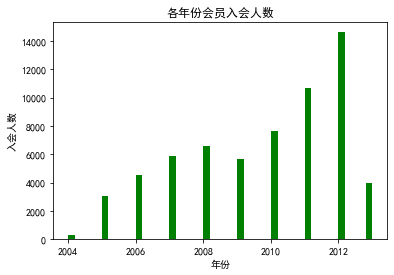

In [5]:
from datetime import datetime
import matplotlib.pyplot as plt

 
ffp = data['FFP_DATE'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
ffp_year = ffp.map(lambda x: x.year)
 
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
# 绘制各年份会员入会人数直方图
plt.hist(ffp_year, bins='auto', color='green')
plt.xlabel('年份')
plt.ylabel('入会人数')
plt.title('各年份会员入会人数')
 
plt.show()

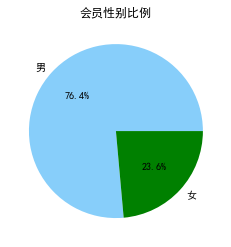

In [6]:
import matplotlib.pyplot as plt
 
# 获取会员中不同的性别人数
male = pd.value_counts(data['GENDER'])['男']
female = pd.value_counts(data['GENDER'])['女']
 
# 绘制会员分布饼状图
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
 
plt.pie([male, female], labels=['男', '女'], colors=['lightskyblue', 'green'], autopct='%1.1f%%')
plt.title('会员性别比例')
plt.show()

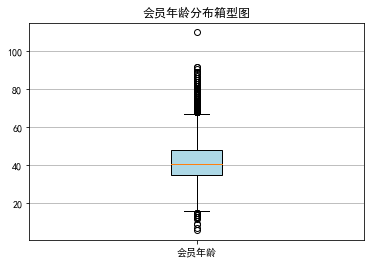

In [7]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
 
# 提取会员的年龄
age = data['AGE'].dropna()
age = age.astype('int64')
 
# 绘制会员年龄分布箱型图
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
 
plt.boxplot(age, patch_artist=True, labels=['会员年龄'], boxprops={'facecolor': 'lightblue'})
plt.title('会员年龄分布箱型图')
plt.grid(axis='y')
plt.show()

In [8]:
import pandas as pd
from datetime import datetime
 
data_corr = data[['FFP_TIER', 'FLIGHT_COUNT', 'LAST_TO_END', 'SEG_KM_SUM', 'EXCHANGE_COUNT', 'Points_Sum']]
age_1 = data['AGE'].fillna(0)
data_corr['AGE'] = age_1.astype('int64')
 
ffp = data['FFP_DATE'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
ffp_year = ffp.map(lambda x: x.year)
data_corr['ffp_year'] = ffp_year
 
# 计算相关性矩阵
dt_corr = data_corr.corr(method='pearson')
print(dt_corr)

C:\Users\asus\AppData\Local\Temp/ipykernel_1976/3509451889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['AGE'] = age_1.astype('int64')


                FFP_TIER  FLIGHT_COUNT  LAST_TO_END  SEG_KM_SUM  \
FFP_TIER        1.000000      0.582447    -0.206313    0.522350   
FLIGHT_COUNT    0.582447      1.000000    -0.404999    0.850411   
LAST_TO_END    -0.206313     -0.404999     1.000000   -0.369509   
SEG_KM_SUM      0.522350      0.850411    -0.369509    1.000000   
EXCHANGE_COUNT  0.342355      0.502501    -0.169717    0.507819   
Points_Sum      0.559249      0.747092    -0.292027    0.853014   
AGE             0.076245      0.075309    -0.027654    0.087285   
ffp_year       -0.116510     -0.188181     0.117913   -0.171508   

                EXCHANGE_COUNT  Points_Sum       AGE  ffp_year  
FFP_TIER              0.342355    0.559249  0.076245 -0.116510  
FLIGHT_COUNT          0.502501    0.747092  0.075309 -0.188181  
LAST_TO_END          -0.169717   -0.292027 -0.027654  0.117913  
SEG_KM_SUM            0.507819    0.853014  0.087285 -0.171508  
EXCHANGE_COUNT        1.000000    0.578581  0.032760 -0.216610  
Points

C:\Users\asus\AppData\Local\Temp/ipykernel_1976/3509451889.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['ffp_year'] = ffp_year


In [9]:
import pandas as pd
from datetime import datetime
 
clean_datafile = 'air_data_clean.csv'
 
print('原始数据的数据大小：', data.shape)
 
# 去除票价为空的票价
airline_notnull = data.loc[data['SUM_YR_1'].notnull() & data['SUM_YR_2'].notnull(), :]
print(airline_notnull.shape)
 
# 只保留票价非0的，或者平均折扣率不为0且总飞行公里数大于0的记录
index1 = airline_notnull['SUM_YR_1'] != 0
index2 = airline_notnull['SUM_YR_2'] != 0
index3 = (airline_notnull['SEG_KM_SUM'] > 0) & (airline_notnull['avg_discount'] != 0)
index4 = airline_notnull['AGE'] > 0
clean_data = airline_notnull[(index1 | index2) & index3 & ~index4]
print(clean_data.shape)
# 保存清洗后的文件
clean_data.to_csv(clean_datafile)

原始数据的数据大小： (62988, 44)
(62299, 44)
(412, 44)


In [10]:
import pandas as pd
from datetime import datetime
 
guiyue_datafile = 'air_customer_data_guiyue.csv'
 
clean_data = pd.read_csv(clean_datafile)
 
# 选取需要的属性
air_selection = clean_data[['FFP_DATE', 'LOAD_TIME', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
 
print(air_selection.head())
 
# 保存规约后的数据
air_selection.to_csv(guiyue_datafile)

     FFP_DATE   LOAD_TIME  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
0  2011-06-07  2014-03-31            6            23      214590      1.061631
1  2004-12-02  2014-03-31          136            12      103960      1.007991
2  2009-05-16  2014-03-31           28            34       90814      0.883529
3  2012-09-12  2014-03-31          314            10      100472      0.634800
4  2011-11-20  2014-03-31           38            65       89309      0.654887


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

stand_datafile = 'air_customer_data_std.npz'
guiyue_data = pd.read_csv(guiyue_datafile)
# 特征构造，并将时间类型转化为int类型
L = pd.to_datetime(guiyue_data['LOAD_TIME']) - pd.to_datetime(guiyue_data['FFP_DATE'])
L = (L.astype('str').str.split().str[0]).astype('int') / 30
 
air_feature = pd.concat([L, guiyue_data.iloc[:, 3:]], axis=1)
print('构建的 LRFMC 模型属性的前5个数据为：\n', air_feature.head())
 
# 数据标准化
std_data = StandardScaler().fit_transform(air_feature)
np.savez(stand_datafile, std_data)
 
print('标准化后 LRFMC 的 前5个属性数据为：\n', std_data[:5, :])

构建的 LRFMC 模型属性的前5个数据为：
             0  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
0   34.266667            6            23      214590      1.061631
1  113.533333          136            12      103960      1.007991
2   59.333333           28            34       90814      0.883529
3   18.833333          314            10      100472      0.634800
4   28.733333           38            65       89309      0.654887
标准化后 LRFMC 的 前5个属性数据为：
 [[-1.31999041 -1.0309819   1.49039878 11.16789116  1.49948289]
 [ 1.8379018  -0.33005031  0.34731412  5.03062725  1.2424506 ]
 [-0.32136344 -0.91236271  2.63348344  4.30134522  0.64605199]
 [-1.93483654  0.62968679  0.13948054  4.83712842 -0.54581652]
 [-1.540432   -0.8584449   5.85490385  4.21785447 -0.44956427]]


In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
 
# 读取标准化之后的数据
std_data = np.load(stand_datafile)['arr_0']
 
k = 5  # 确定聚类中心数，这里选择5，也就是分为5个群。这个值的确定，是有一定的要求的，这里不做描述
 
# 模型训练
kmeans_model = KMeans(n_clusters=k, n_jobs=4, random_state=123)
fit_kmeans = kmeans_model.fit(std_data)
 
# 查看聚类结果
kmeans_cc = kmeans_model.cluster_centers_   # 聚类中心
print('各聚类中心为： \n', kmeans_cc)
 
kmeans_label = kmeans_model.labels_   # 样本的类别标签
 
r = pd.Series(kmeans_label).value_counts()  # 统计不同类别样本的数目
print('每个类别的数目为：\n', r)
 
# 输出聚类分群的结果
cluster_center = pd.DataFrame(kmeans_cc, columns=['ZL', 'ZR', 'ZF', 'ZM', 'ZC'])
 
cluster_center['聚类个数'] = r
 
cluster_center.index = pd.DataFrame(kmeans_label).drop_duplicates().iloc[:, 0]
 
print('聚类结果如下表所示：\n', cluster_center)

各聚类中心为： 
 [[ 0.66118215 -0.41999645 -0.19990087 -0.21067582 -0.23416648]
 [-1.09262779 -0.40934122  0.06001476  0.07240748 -0.27424361]
 [-0.24501264  1.53261154 -0.53980709 -0.47035389 -0.02572988]
 [ 0.31328139 -0.85239957  2.56735458  2.3691138  -0.04524978]
 [-0.32973981 -0.38521238 -0.15228582 -0.12326364  2.60611881]]
每个类别的数目为：
 0    173
2     95
1     85
3     33
4     26
dtype: int64
聚类结果如下表所示：
          ZL        ZR        ZF        ZM        ZC  聚类个数
0                                                        
3  0.661182 -0.419996 -0.199901 -0.210676 -0.234166   173
4 -1.092628 -0.409341  0.060015  0.072407 -0.274244    85
1 -0.245013  1.532612 -0.539807 -0.470354 -0.025730    95
0  0.313281 -0.852400  2.567355  2.369114 -0.045250    33
2 -0.329740 -0.385212 -0.152286 -0.123264  2.606119    26


E:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


E:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


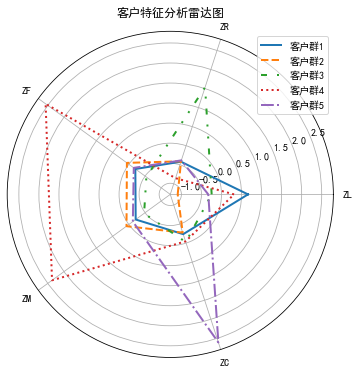

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
# 读取标准化之后的数据
std_data = np.load(stand_datafile)['arr_0']
 
k = 5  # 确定聚类中心数，这里选择5，也就是分为5个群。这个值的确定，是有一定的要求的，这里不做描述
 
# 模型训练
kmeans_model = KMeans(n_clusters=k, n_jobs=4, random_state=123)
fit_kmeans = kmeans_model.fit(std_data)
 
# 查看聚类结果
kmeans_cc = kmeans_model.cluster_centers_  # 聚类中心
 
kmeans_label = kmeans_model.labels_  # 样本的类别标签
 
# 输出聚类分群的结果
labels = ['ZL', 'ZR', 'ZF', 'ZM', 'ZC']
 
cluster_center = pd.DataFrame(kmeans_cc, columns=labels)
 
legen = ['客户群' + str(i + 1) for i in cluster_center.index]  # 客户群命名
 
lstype = ['-', '--', (0, (3, 5, 1, 5, 1, 5)), ':', '-.']
 
kinds = list(cluster_center.iloc[:, 0])
 
cluster_center = pd.concat([cluster_center, cluster_center[['ZL']]], axis=1)
 
centers = np.array(cluster_center.iloc[:, 0:])
 
# 分割圆周长，让其闭合
n = len(labels)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))
 
# 绘制雷达图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)  # 以极坐标的形式绘制图形
# 处理中文显示问题
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
 
# 画线
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linestyle=lstype[i], linewidth=2, label=kinds[i])
# 添加属性标签
ang=angle * 180 / np.pi
ax.set_thetagrids(ang[:-1], labels)
 
plt.title('客户特征分析雷达图')
plt.legend(legen)
plt.show()

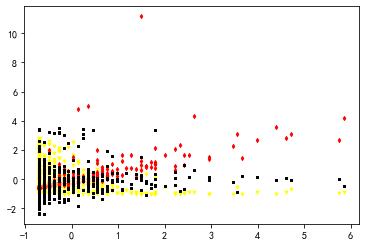

In [14]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
std_data = np.load(stand_datafile)['arr_0']
 # 创建画布
fig = plt.figure()
ax = fig.add_subplot(111)

p1 = ax.scatter(std_data[:, 2], std_data[:, 1], marker='v', color='yellow', s=8)

p2 = ax.scatter(std_data[:, 2], std_data[:, 3], marker='d', color='red', s=8)

p2 = ax.scatter(std_data[:, 2], std_data[:, 4], marker='s', color='black', s=8)
plt.show()